In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk

In [2]:
df= pd.read_csv('july.csv')
df

,Time_submitted,Review,Rating,Total_thumbsup,Reply
0,09-07-2022 15:00,"Great music service, the audio is high quality...",5,2,NaN
1,09-07-2022 14:21,Please ignore previous negative rating. This a...,5,1,NaN
2,09-07-2022 13:27,"This pop-up ""Get the best Spotify experience o...",4,0,NaN
3,09-07-2022 13:26,Really buggy and terrible to use as of recently,1,1,NaN
4,09-07-2022 13:20,Dear Spotify why do I get songs that I didn't ...,1,1,NaN
...,...,...,...,...,...
3895,01-07-2022 00:14,Love it's to listen the music I Want,5,0,NaN
3896,01-07-2022 00:11,I really like the app just that the ads can be...,5,0,NaN
3897,01-07-2022 00:07,I can listen to the music I prefer.,5,0,NaN
3898,01-07-2022 00:04,No need to say anthing but the fact that its j...,5,0,NaN


In [3]:
df= df[['Review','Rating']]
df['Length']= df['Review'].apply(len)
df.head()

<ipython-input-3-4639b52e02a0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Length']= df['Review'].apply(len)


,Review,Rating,Length
0,"Great music service, the audio is high quality...",5,112
1,Please ignore previous negative rating. This a...,5,86
2,"This pop-up ""Get the best Spotify experience o...",4,106
3,Really buggy and terrible to use as of recently,1,47
4,Dear Spotify why do I get songs that I didn't ...,1,100


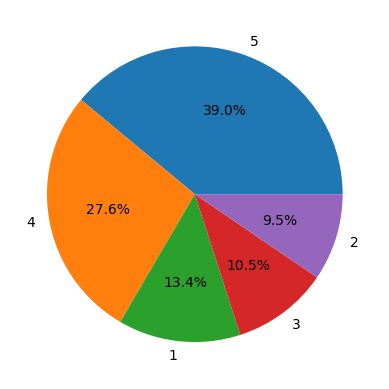

In [6]:
plt.pie(df['Rating'].value_counts(), labels=df['Rating'].unique(), autopct='%1.1f%%')
plt.show()

In [7]:
def rating(score):
  if score > 3:
    return 'Positive'
  elif score == 3:
    return 'Neutral'
  else:
    return 'Negative'

### **Data Preprocessing**

In [4]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

def cleaning(text):
    # Converting to lowercase and removing punctuations
    text_clean = text.translate(str.maketrans('', '', string.punctuation)).lower()
    # Removing stopwords
    text_clean = [word for word in text_clean.split() if word not in stopwords.words('english')]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    sentence = [lemmatizer.lemmatize(word, 'v') for word in text_clean]
    return ' '.join(sentence)

df['Review'] = df['Review'].apply(cleaning)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
<ipython-input-4-af004f369005>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Review'] = df['Review'].apply(cleaning)


In [5]:
pip install afinn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 1.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53429 sha256=592b0d090efd66e3579d0398a00f207894f227c8442e0fdcb8e6b3cab00478c5
  Stored in directory: /root/.cache/pip/wheels/b0/05/90/43f79196199a138fb486902fceca30a2d1b5228e6d2db8eb90
Successfully built afinn


In [6]:
!pip install pattern

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 35.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.5/89.5 kB 9.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 82.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 93.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 348.4/348.4 kB 30.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.6/101.6 kB 10.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pattern: filename=Pattern-3.6-py3-none-any.whl size=22332702 sha256=f40923c953572b5d00bea11e0143e47a5c5217fa4c51fca550

In [7]:
import nltk
from nltk.corpus import sentiwordnet as swn
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
from afinn import Afinn
from pattern.en import sentiment

nltk.download('vader_lexicon')
nltk.download('sentiwordnet')

def vader_sentiment(text):
    sia = SentimentIntensityAnalyzer()
    sentiment_scores = sia.polarity_scores(text)
    return sentiment_scores['compound']

def textblob_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

def afinn_sentiment(text):
    afinn = Afinn()
    return afinn.score(text)

def sentiwordnet_sentiment(text):
    sentiment_scores = []
    for word in text.split():
        synsets = list(swn.senti_synsets(word))
        if synsets:
            sentiment = synsets[0]
            sentiment_scores.append(sentiment.pos_score() - sentiment.neg_score())
    if sentiment_scores:
        return sum(sentiment_scores) / len(sentiment_scores)
    else:
        return 0

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package sentiwordnet to /root/nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!


In [8]:
df['VADER Sentiment'] = df['Review'].apply(vader_sentiment)
df['TextBlob Sentiment'] = df['Review'].apply(textblob_sentiment)
df['AFINN Sentiment'] = df['Review'].apply(afinn_sentiment)
df['SentiWordNet Sentiment'] = df['Review'].apply(sentiwordnet_sentiment)

<ipython-input-8-94c4dc41d4af>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['VADER Sentiment'] = df['Review'].apply(vader_sentiment)


Lexicons- Part 1

In [9]:
def map_sentiment(score):
    if score >= 0.04:
        return 5
    elif score > 0 and score < 0.04:
        return 4
    elif score <= -0.04:
        return 1
    elif score < 0 and score > -0.04:
        return 2
    else:
        return 3

In [10]:
def map_afinn_sentiment(score):
    if score > 1:
        return 5
    elif score > 0  and score <= 1:
        return 4
    elif score < -1:
        return 1
    elif score < 0 and score >= -1:
      return 2
    else:
        return 3

In [11]:
#Accuracy for VADER
df['VADER Sentiment Label'] = df['VADER Sentiment'].apply(map_sentiment)
vader_accuracy = (df['VADER Sentiment Label'] == df['Rating']).mean()*100

#Accuracy for TextBlob
df['TextBlob Sentiment Label'] = df['TextBlob Sentiment'].apply(map_sentiment)
textblob_accuracy = (df['TextBlob Sentiment Label'] == df['Rating']).mean()*100

#Accuracy for AFINN
df['AFINN Sentiment Label'] = df['AFINN Sentiment'].apply(map_afinn_sentiment)
afinn_accuracy = (df['AFINN Sentiment Label'] == df['Rating']).mean()*100

#Accuracy for SentiWordNet
df['SentiWordNet Sentiment Label'] = df['SentiWordNet Sentiment'].apply(map_sentiment)
sentiwordnet_accuracy = (df['SentiWordNet Sentiment Label'] == df['Rating']).mean()*100

print("Accuracy for Vader:", vader_accuracy)
print("Accuracy for TextBlob:", textblob_accuracy)
print("Accuracy for AFINN:", afinn_accuracy)
print("Accuracy for SentiWordNet:", sentiwordnet_accuracy)

Accuracy for Vader: 49.1025641025641
Accuracy for TextBlob: 45.51282051282051
Accuracy for AFINN: 46.205128205128204
Accuracy for SentiWordNet: 39.282051282051285


In [12]:
from sklearn.metrics import confusion_matrix

vader_confusion_matrix = confusion_matrix(df['Rating'], df['VADER Sentiment Label'])
textblob_confusion_matrix = confusion_matrix(df['Rating'], df['TextBlob Sentiment Label'])
afinn_confusion_matrix = confusion_matrix(df['Rating'], df['AFINN Sentiment Label'])
sentiwordnet_confusion_matrix = confusion_matrix(df['Rating'], df['SentiWordNet Sentiment Label'])

In [13]:
def calculate_precision(confusion_matrix):
    true_positives = confusion_matrix[1][1]  # Sentiment class: positive
    false_positives = confusion_matrix[0][1]  # Sentiment class: positive
    precision = true_positives / (true_positives + false_positives)
    return precision

vader_precision = calculate_precision(vader_confusion_matrix)
textblob_precision = calculate_precision(textblob_confusion_matrix)
afinn_precision = calculate_precision(afinn_confusion_matrix)
sentiwordnet_precision = calculate_precision(sentiwordnet_confusion_matrix)

print("Precision for Vader:", vader_precision)
print("Precision for TextBlob:", textblob_precision)
print("Precision for AFINN:", afinn_precision)
print("Precision for SentiWordNet:", sentiwordnet_precision)

Precision for Vader: 0.09090909090909091
Precision for TextBlob: 0.3157894736842105
Precision for AFINN: 0.23125
Precision for SentiWordNet: 0.23529411764705882


In [14]:
def calculate_recall(confusion_matrix):
    true_positives = confusion_matrix[1][1]  # Sentiment class: positive
    false_negatives = confusion_matrix[1][0]  # Sentiment class: positive
    recall = true_positives / (true_positives + false_negatives)
    return recall

vader_recall = calculate_recall(vader_confusion_matrix)
textblob_recall = calculate_recall(textblob_confusion_matrix)
afinn_recall = calculate_recall(afinn_confusion_matrix)
sentiwordnet_recall = calculate_recall(sentiwordnet_confusion_matrix)

print("Recall for Vader:", vader_recall)
print("Recall for TextBlob:", textblob_recall)
print("Recall for AFINN:", afinn_recall)
print("Recall for SentiWordNet:", sentiwordnet_recall)


Recall for Vader: 0.007692307692307693
Recall for TextBlob: 0.13953488372093023
Recall for AFINN: 0.27205882352941174
Recall for SentiWordNet: 0.6355140186915887


In [15]:
def calculate_f1_score(confusion_matrix):
    true_positives = confusion_matrix[1][1]  # Sentiment class: positive
    false_positives = confusion_matrix[0][1]  # Sentiment class: positive
    false_negatives = confusion_matrix[1][0]  # Sentiment class: positive

    precision = true_positives / (true_positives + false_positives)
    recall = true_positives / (true_positives + false_negatives)

    # Calculate the F1 score using the precision and recall
    f1_score = 2 * (precision * recall) / (precision + recall)

    return f1_score

# Calculate F1 score for VADER sentiment analysis
vader_f1_score = calculate_f1_score(vader_confusion_matrix)

# Calculate F1 score for TextBlob sentiment analysis
textblob_f1_score = calculate_f1_score(textblob_confusion_matrix)

# Calculate F1 score for AFINN sentiment analysis
afinn_f1_score = calculate_f1_score(afinn_confusion_matrix)

# Calculate F1 score for SentiWordNet sentiment analysis
sentiwordnet_f1_score = calculate_f1_score(sentiwordnet_confusion_matrix)

# Print the F1 scores for each sentiment analysis method
print("F1 Score for Vader:", vader_f1_score)
print("F1 Score for TextBlob:", textblob_f1_score)
print("F1 Score for AFINN:", afinn_f1_score)
print("F1 Score for SentiWordNet:", sentiwordnet_f1_score)


F1 Score for Vader: 0.014184397163120569
F1 Score for TextBlob: 0.19354838709677416
F1 Score for AFINN: 0.25
F1 Score for SentiWordNet: 0.3434343434343434


Lexicons- Part 2

In [16]:
df.loc[df['Rating'] == 4, 'Rating'] = 5
df.loc[df['Rating'] == 2, 'Rating'] = 1

In [17]:
#function to map sentiment scores to sentiment labels
def map_sentiment(score):
    if score > 0.04:
        return 5
    elif score > -0.04:
        return 3
    else:
        return 1

def map_afinn_sentiment(score):
    if score > 0.5:
        return 5
    elif score < -0.5:
        return 1
    else:
        return 3

# Mapping sentiment scores to sentiment labels for each lexicon
df['VADER Sentiment Label'] = df['VADER Sentiment'].apply(map_sentiment)
df['TextBlob Sentiment Label'] = df['TextBlob Sentiment'].apply(map_sentiment)
df['AFINN Sentiment Label'] = df['AFINN Sentiment'].apply(map_sentiment)
df['SentiWordNet Sentiment Label'] = df['SentiWordNet Sentiment'].apply(map_sentiment)

#Accuracy for each lexicon
vader_accuracy = (df['VADER Sentiment Label'] == df['Rating']).mean() * 100
textblob_accuracy = (df['TextBlob Sentiment Label'] == df['Rating']).mean() * 100
afinn_accuracy = (df['AFINN Sentiment Label'] == df['Rating']).mean() * 100
sentiwordnet_accuracy = (df['SentiWordNet Sentiment Label'] == df['Rating']).mean() * 100

print("Accuracy for VADER:", vader_accuracy)
print("Accuracy for TextBlob:", textblob_accuracy)
print("Accuracy for AFINN:", afinn_accuracy)
print("Accuracy for SentiWordNet:", sentiwordnet_accuracy)


Accuracy for VADER: 63.358974358974365
Accuracy for TextBlob: 58.23076923076923
Accuracy for AFINN: 63.153846153846146
Accuracy for SentiWordNet: 47.66666666666667


In [18]:
from sklearn.metrics import confusion_matrix

vader_confusion_matrix = confusion_matrix(df['Rating'], df['VADER Sentiment Label'])
textblob_confusion_matrix = confusion_matrix(df['Rating'], df['TextBlob Sentiment Label'])
afinn_confusion_matrix = confusion_matrix(df['Rating'], df['AFINN Sentiment Label'])
sentiwordnet_confusion_matrix = confusion_matrix(df['Rating'], df['SentiWordNet Sentiment Label'])

In [19]:
def calculate_precision(confusion_matrix):
    true_positives = confusion_matrix[1][1]  # Sentiment class: positive
    false_positives = confusion_matrix[0][1]  # Sentiment class: positive
    precision = true_positives / (true_positives + false_positives)
    return precision

vader_precision = calculate_precision(vader_confusion_matrix)
textblob_precision = calculate_precision(textblob_confusion_matrix)
afinn_precision = calculate_precision(afinn_confusion_matrix)
sentiwordnet_precision = calculate_precision(sentiwordnet_confusion_matrix)

print("Precision for Vader:", vader_precision)
print("Precision for TextBlob:", textblob_precision)
print("Precision for AFINN:", afinn_precision)
print("Precision for SentiWordNet:", sentiwordnet_precision)

Precision for Vader: 0.18861209964412812
Precision for TextBlob: 0.1847457627118644
Precision for AFINN: 0.21140142517814728
Precision for SentiWordNet: 0.1947935368043088


In [20]:
def calculate_recall(confusion_matrix):
    true_positives = confusion_matrix[1][1]  # Sentiment class: positive
    false_negatives = confusion_matrix[1][0]  # Sentiment class: positive
    recall = true_positives / (true_positives + false_negatives)
    return recall

vader_recall = calculate_recall(vader_confusion_matrix)
textblob_recall = calculate_recall(textblob_confusion_matrix)
afinn_recall = calculate_recall(afinn_confusion_matrix)
sentiwordnet_recall = calculate_recall(sentiwordnet_confusion_matrix)

print("Recall for Vader:", vader_recall)
print("Recall for TextBlob:", textblob_recall)
print("Recall for AFINN:", afinn_recall)
print("Recall for SentiWordNet:", sentiwordnet_recall)


Recall for Vader: 0.34415584415584416
Recall for TextBlob: 0.6264367816091954
Recall for AFINN: 0.49444444444444446
Recall for SentiWordNet: 0.8443579766536965


In [21]:
def calculate_f1_score(confusion_matrix):
    true_positives = confusion_matrix[1][1]  # Sentiment class: positive
    false_positives = confusion_matrix[0][1]  # Sentiment class: positive
    false_negatives = confusion_matrix[1][0]  # Sentiment class: positive

    precision = true_positives / (true_positives + false_positives)
    recall = true_positives / (true_positives + false_negatives)

    # Calculate the F1 score using the precision and recall
    f1_score = 2 * (precision * recall) / (precision + recall)

    return f1_score

# Calculate F1 score for VADER sentiment analysis
vader_f1_score = calculate_f1_score(vader_confusion_matrix)

# Calculate F1 score for TextBlob sentiment analysis
textblob_f1_score = calculate_f1_score(textblob_confusion_matrix)

# Calculate F1 score for AFINN sentiment analysis
afinn_f1_score = calculate_f1_score(afinn_confusion_matrix)

# Calculate F1 score for SentiWordNet sentiment analysis
sentiwordnet_f1_score = calculate_f1_score(sentiwordnet_confusion_matrix)

# Print the F1 scores for each sentiment analysis method
print("F1 Score for Vader:", vader_f1_score)
print("F1 Score for TextBlob:", textblob_f1_score)
print("F1 Score for AFINN:", afinn_f1_score)
print("F1 Score for SentiWordNet:", sentiwordnet_f1_score)


F1 Score for Vader: 0.24367816091954023
F1 Score for TextBlob: 0.28534031413612565
F1 Score for AFINN: 0.2961730449251248
F1 Score for SentiWordNet: 0.31655725747629465


# ML

In [22]:
import pandas as pd
df1= pd.read_csv('july.csv')

df1= df1[['Review','Rating']]

import nltk
import string
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

def cleaning(text):
    # Converting to lowercase and removing punctuations
    text_clean = text.translate(str.maketrans('', '', string.punctuation)).lower()
    # Removing stopwords
    text_clean = [word for word in text_clean.split() if word not in stopwords.words('english')]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    sentence = [lemmatizer.lemmatize(word, 'v') for word in text_clean]
    return ' '.join(sentence)

df1['Review'] = df1['Review'].apply(cleaning)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


ML- Part 1

**Logistic Regression**

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df1['Review'], df1['Rating'], test_size=0.2, random_state=16)

# Creating a TF-IDF vectorizer
vectorizer = TfidfVectorizer()
# Fitting and transforming the training data
X_train_vectors = vectorizer.fit_transform(X_train)
# Transforming the testing data
X_test_vectors = vectorizer.transform(X_test)

# Creating a logistic regression model
model1 = LogisticRegression()
# Training the model
model1.fit(X_train_vectors, y_train)

LogisticRegression()

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_pred = model1.predict(X_test_vectors)
print('Accuracy:', accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred, average='macro'))
print("Recall: ", recall_score(y_test, y_pred, average='macro'))
print("F1 score: ", f1_score(y_test, y_pred, average='macro'))

Accuracy: 0.6051282051282051
Precision:  0.4175790067973356
Recall:  0.38674538915855605
F1 score:  0.35642422749480274


**Random Forest**

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(df1['Review'], df1['Rating'], test_size=0.2, random_state=16)

vectorizer = TfidfVectorizer()
X_train_vectors = vectorizer.fit_transform(X_train)
X_test_vectors = vectorizer.transform(X_test)

model2 = RandomForestClassifier()
model2.fit(X_train_vectors, y_train)

RandomForestClassifier()

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_pred = model2.predict(X_test_vectors)
print('Accuracy:', accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred, average='macro'))
print("Recall: ", recall_score(y_test, y_pred, average='macro'))
print("F1 score: ", f1_score(y_test, y_pred, average='macro'))

Accuracy: 0.573076923076923
Precision:  0.37319853703377726
Recall:  0.34082553449622155
F1 score:  0.2842830245015856


**SVM**

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(df1['Review'], df1['Rating'], test_size=0.2, random_state=16)

vectorizer = TfidfVectorizer()
X_train_vectors = vectorizer.fit_transform(X_train)
X_test_vectors = vectorizer.transform(X_test)

model3 = SVC()
model3.fit(X_train_vectors, y_train)


SVC()

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_pred = model3.predict(X_test_vectors)
print('Accuracy:', accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred, average='macro'))
print("Recall: ", recall_score(y_test, y_pred, average='macro'))
print("F1 score: ", f1_score(y_test, y_pred, average='macro'))

Accuracy: 0.6166666666666667
Precision:  0.3421169259783121
Recall:  0.37533171733301646
F1 score:  0.31849934950594205


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Naive Bayes**

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(df1['Review'], df1['Rating'], test_size=0.2, random_state=16)

vectorizer = TfidfVectorizer()
X_train_vectors = vectorizer.fit_transform(X_train)
X_test_vectors = vectorizer.transform(X_test)

model4 = MultinomialNB()
model4.fit(X_train_vectors, y_train)

MultinomialNB()

In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_pred = model4.predict(X_test_vectors)
print('Accuracy:', accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred, average='macro'))
print("Recall: ", recall_score(y_test, y_pred, average='macro'))
print("F1 score: ", f1_score(y_test, y_pred, average='macro'))

Accuracy: 0.617948717948718
Precision:  0.24426467648430733
Recall:  0.3656778889899909
F1 score:  0.2922345971108162


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ML- Part 2

In [31]:
df1.loc[df1['Rating'] == 4, 'Rating'] = 5
df1.loc[df1['Rating'] == 2, 'Rating'] = 1

**Logistic Regression**

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(df1['Review'], df1['Rating'], test_size=0.2, random_state=16)

vectorizer = TfidfVectorizer()
X_train_vectors = vectorizer.fit_transform(X_train)
X_test_vectors = vectorizer.transform(X_test)

model5 = LogisticRegression()
model5.fit(X_train_vectors, y_train)

LogisticRegression()

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_pred = model5.predict(X_test_vectors)
print('Accuracy:', accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred, average='macro'))
print("Recall: ", recall_score(y_test, y_pred, average='macro'))
print("F1 score: ", f1_score(y_test, y_pred, average='macro'))

Accuracy: 0.791025641025641
Precision:  0.6903639553970681
Recall:  0.5927805060318138
F1 score:  0.56187586673909


**Random Forest**

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(df1['Review'], df1['Rating'], test_size=0.2, random_state=16)

vectorizer = TfidfVectorizer()
X_train_vectors = vectorizer.fit_transform(X_train)
X_test_vectors = vectorizer.transform(X_test)

model6 = RandomForestClassifier()
model6.fit(X_train_vectors, y_train)

RandomForestClassifier()

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_pred = model6.predict(X_test_vectors)
print('Accuracy:', accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred, average='macro'))
print("Recall: ", recall_score(y_test, y_pred, average='macro'))
print("F1 score: ", f1_score(y_test, y_pred, average='macro'))

Accuracy: 0.7461538461538462
Precision:  0.5375325514087766
Recall:  0.5567811940263098
F1 score:  0.5298605150019321


**SVM**

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(df1['Review'], df1['Rating'], test_size=0.2, random_state=16)

vectorizer = TfidfVectorizer()
X_train_vectors = vectorizer.fit_transform(X_train)
X_test_vectors = vectorizer.transform(X_test)

model7 = SVC()
model7.fit(X_train_vectors, y_train)


SVC()

In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_pred = model7.predict(X_test_vectors)
print('Accuracy:', accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred, average='macro'))
print("Recall: ", recall_score(y_test, y_pred, average='macro'))
print("F1 score: ", f1_score(y_test, y_pred, average='macro'))

Accuracy: 0.7897435897435897
Precision:  0.5219251336898395
Recall:  0.5907120743034056
F1 score:  0.5538415094339623


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Naive Bayes**

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(df1['Review'], df1['Rating'], test_size=0.2, random_state=16)

vectorizer = TfidfVectorizer()
X_train_vectors = vectorizer.fit_transform(X_train)
X_test_vectors = vectorizer.transform(X_test)

model8 = MultinomialNB()
model8.fit(X_train_vectors, y_train)

MultinomialNB()

In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_pred = model8.predict(X_test_vectors)
print('Accuracy:', accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred, average='macro'))
print("Recall: ", recall_score(y_test, y_pred, average='macro'))
print("F1 score: ", f1_score(y_test, y_pred, average='macro'))

Accuracy: 0.7756410256410257
Precision:  0.5125448028673835
Recall:  0.5757309941520468
F1 score:  0.5422718594883543


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
